Epoch 1/15


C:\Users\water\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0121
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5754e-04
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1211e-04
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.9837e-04
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.5021e-04
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4414e-04
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2123e-04
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2864e-04
Epoch 9/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5012e-04
Epoch 10/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2788e-04
Epoch 11/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1052e-04
Epoch 12/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1492e-04
Epoch 13/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1162e-04
Epoch 14/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.1715e-04
Epoch 15/15
251/

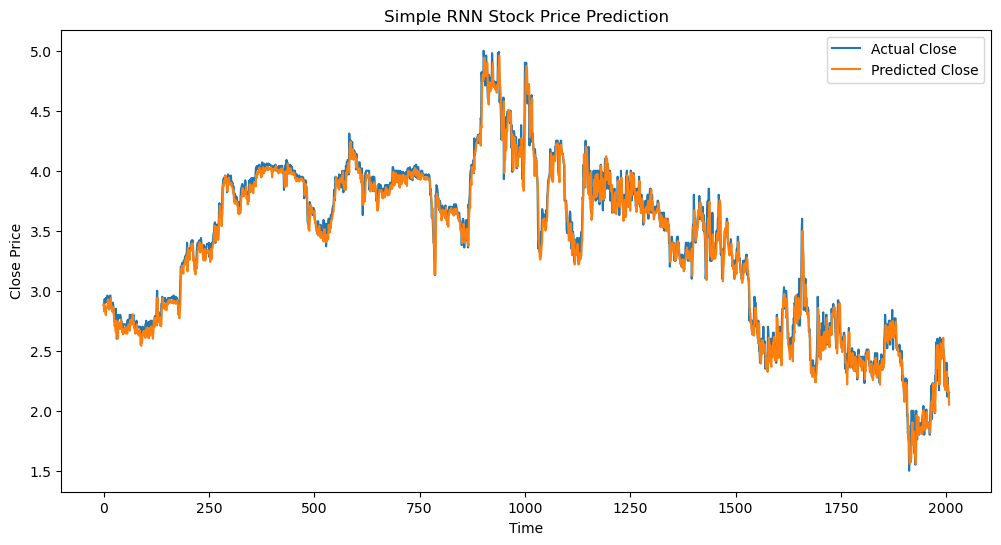

In [3]:
# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 2. 데이터 불러오기
df=pd.read_csv("C:/Users/water/OneDrive/바탕 화면/iris-classification/AAME.csv")

# 3. 사용할 피처 선택
feature_cols = ["Open", "High", "Low", "Close", "Volume"]
data = df[feature_cols].values

# 4. 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 5. 시퀀스 생성 함수
def create_sequences(data, target_index, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window][target_index])
    return np.array(X), np.array(y)

# 6. 시퀀스 생성
window = 60
target_index = feature_cols.index("Close")
X, y = create_sequences(scaled_data, target_index, window)

# 7. 훈련/테스트 분할
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 8. RNN 모델 구성
model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(window, len(feature_cols))),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

# 9. 학습
model.fit(X_train, y_train, epochs=15, batch_size=32)

# 10. 예측
predicted = model.predict(X_test)

# 11. Close 값 역변환
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[target_index], scaler.scale_[target_index]
predicted_close = close_scaler.inverse_transform(predicted)
real_close = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# 12. 시각화
plt.figure(figsize=(12,6))
plt.plot(real_close, label="Actual Close")
plt.plot(predicted_close, label="Predicted Close")
plt.title("Simple RNN Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()
